In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation

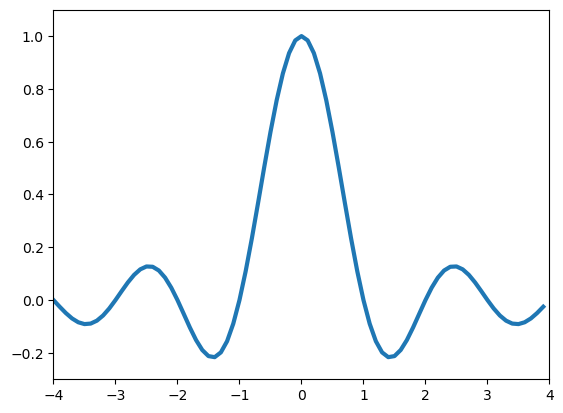

In [47]:


x = [] # порожній список для абсцис
y = [] # порожній список для ординат
fig, ax = plt.subplots() #площина для графіка

# функція, що малюватиме кожен фрейм для анімації
def animate(i):
    t=-4+i*0.1 # початкове значення для х=-4 крок 0.1 (задавайте крок 1 для простих ліній)
    x.append(t) # формування нової абсциси
    y.append(np.sinc(t)) # обчислення ординати - значень нашої функції
    
    ax.clear() # очистити область
    ax.plot(x, y, lw=3) # побудувати новий графік з доданою точкою

    ax.set_xlim(-4, 4) # проміжок відображення  для х
    ax.set_ylim(-0.3, 1.1)  # проміжок відображення  для у

# запустити анімацю
ani = FuncAnimation(fig, animate, frames=80, interval=30, repeat=False)
# підберіть оптимальну кількість фреймів frames та інтервал interval  для Вашої анімації
ani.save('2.gif', writer='imagemagick')
plt.show()

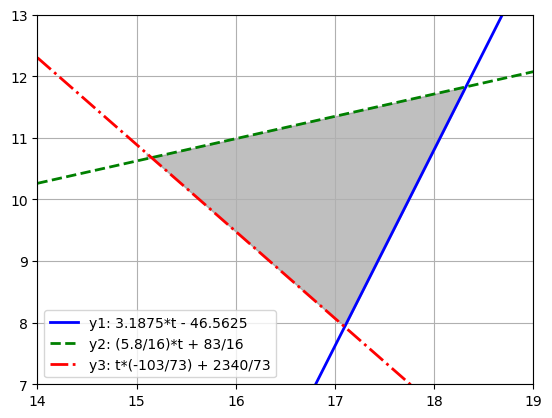

In [48]:
x = []
y1 = []
y2 = []
y3 = []


def func1(t):
    return 3.1875*t - 46.5625

def func2(t):
    return (5.8/16)*t + 83/16

def func3(t):
    return t*(-103/73) + 2340/73


fig, ax = plt.subplots()


def animate(i):
    t = 14 + i * 0.1 
    x.append(t)
    y1.append(func1(t))
    y2.append(func2(t))
    y3.append(func3(t))
    
    ax.clear()  
    
    ax.plot(x, y1, label="y1: 3.1875*t - 46.5625", lw=2, color='blue')
    ax.plot(x, y2, label="y2: (5.8/16)*t + 83/16", lw=2, color='green', linestyle='--')
    ax.plot(x, y3, label="y3: t*(-103/73) + 2340/73", lw=2, color='red', linestyle='-.')
    

    if len(x) > 1:
        x_arr = np.array(x)
        y4 = np.maximum(np.array(y1), np.array(y3))  
        ax.fill_between(x_arr, y4, y2, where=(x_arr > 15) & (x_arr < 18.4), color='gray', alpha=0.5)

    ax.set_xlim(14, 19)
    ax.set_ylim(7, 13)
    
    ax.legend()
    ax.grid()

ani = FuncAnimation(fig, animate, frames=80, interval=30, repeat=False)
ani.save('1.gif', writer='imagemagick')
plt.show()



IndexError: list assignment index out of range

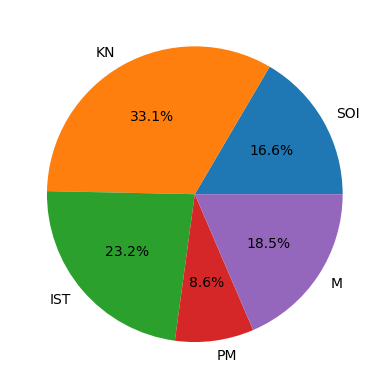

In [49]:

fig, ax = plt.subplots()  # площина для графіка

labels_group = ['SOI', 'KN', 'IST',  'PM', 'M'] # надписи 


ex = [0.2]*5 # відступи для 5 даних

def animate(i):
    ax.clear()
    ax.pie([25, 50, 35, 13, 28], labels=labels_group, explode=ex, autopct='%1.1f%%')

    ex[i-1]= 0 #знищення відступів
      

ani = FuncAnimation(fig, animate, frames=50, interval=560, repeat=False)
ani.save('3.gif', writer='imagemagick')
plt.show()


In [50]:
data = pd.read_csv('kn.csv', sep=";")

stud_test = data["Test1"].value_counts().sort_index()


labels_group = stud_test.index 
values = stud_test.values       
stud_test

Test1
1    2
2    2
3    3
4    7
5    9
Name: count, dtype: int64

IndexError: list assignment index out of range

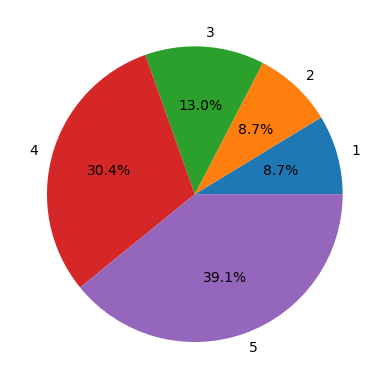

In [51]:
fig, ax = plt.subplots()
explode = [0.1] * 5  

ex = [0.2]*5 

def animate(i):
    ax.clear()
    ax.pie(values, labels=labels_group, explode=ex, autopct='%1.1f%%')

    ex[i-1]= 0 
      
ani = FuncAnimation(fig, animate, frames=50, interval=560, repeat=False)

ani.save('4.gif', writer='imagemagick')
plt.show()


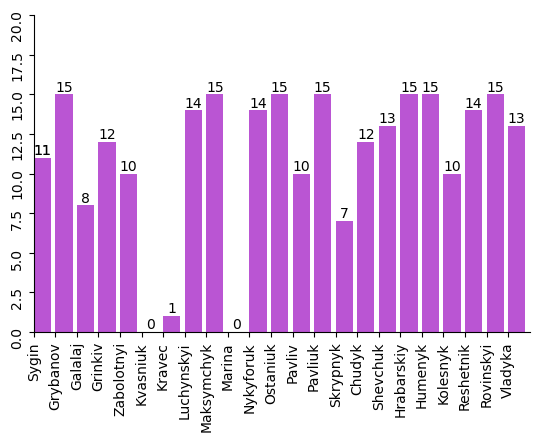

In [52]:
x = []
y = []

fig, ax = plt.subplots()

def animate(i):
    x.append(data.iloc[i]['Student'])
    y.append(data.iloc[i]['KR-6'])

    ax.clear()

    bars = ax.bar(x, y, color='mediumorchid', align='edge')

    ax.bar_label(bars)

    ax.tick_params(labelrotation=90)
    ax.set_xlim([0, len(data)])
    ax.set_ylim([0, data['KR-6'].max() + 5])  # Запас для шкали Y
    ax.spines['top'].set_color(None)
    ax.spines['right'].set_color(None)
    fig.subplots_adjust(bottom=0.22)

ani = FuncAnimation(fig, animate, frames=len(data), interval=400, repeat=False)

ani.save('5.gif', writer='pillow')


plt.show()
